In [4]:
import pandas as pd
df = pd.read_csv('./data/Yelp_reviews.csv')
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,7SO_rX1F6rQEl-5s3wZxgQ,2011-10-03,GxaYFCprt-wyqO--vB4PHQ,4,"After my last review, somewhat scathing regard...",review,J3I2NClEbD1Xr8lOdjxlqQ,1,2,1
1,K2_Hmmo5crTYWiT_1sWnfQ,2011-12-22,FSrIgThMfFIh__TubVQkxw,3,"Ok, so I'm catching up on past-due reviews. F...",review,J3I2NClEbD1Xr8lOdjxlqQ,0,0,0
2,FeI75xIG8PF_XZ6P80gLBQ,2012-06-04,eeJ10gamdNebtq028i0BvA,3,"I want to like Turf, but the food is just okay...",review,64YY0h0ZAR2nbzxbx0IwJg,2,1,0
3,6imLt53br7SJ3av07jjH7w,2012-11-06,SPDbkT9WXghJedf1xxYnOg,5,It's the place to be. \n\nI went before headin...,review,Ypz7hxOCnrg8Y8vxHJU-sQ,0,0,0
4,zmFc8M-hS4uuyY0hklIpoQ,2011-01-17,A2lCUSvDJfIa5kwUoFFk8A,4,A definite favorite in the neighborhood.\n\nTh...,review,nDBly08j5URmrHQ2JCbyiw,2,3,2


In [5]:
import networkx as nx
G = nx.Graph()

In [6]:
names = {}
node_color = []
for n, person in enumerate(df.user_id.unique()):
    name = 'User{}'.format(n)
    names[person] = name
    G.add_node(name)
    node_color.append('green')
for n, biz in enumerate(df.business_id.unique()):
    name = 'Business{}'.format(n)
    names[biz] = name
    G.add_node(name)
    node_color.append('blue')  

In [7]:
for row in df.index:
    user = df['user_id'][row]
    u_name = names[user]
    biz = df['business_id'][row]
    b_name = names[biz]
    G.add_edge(u_name, b_name)

/Users/marigaldina/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


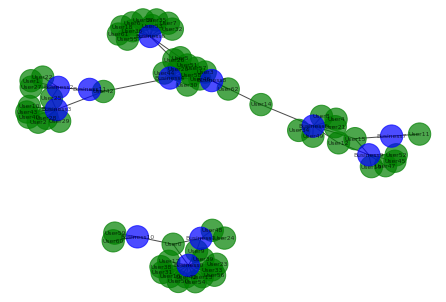

In [8]:
%matplotlib inline
nx.draw(G, with_labels=True, alpha=0.7, font_size=6, node_size=500, node_color=node_color)